In [1]:
import torch 
import matplotlib.pyplot as plt

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
from urllib import request

In [2]:
dataset =  datasets.CIFAR10('.', download=True)
validation_set = datasets.CIFAR10('.', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hrose', 'ship', 'truck']
len(dataset), len(validation_set)

(50000, 10000)

(9, 'truck')

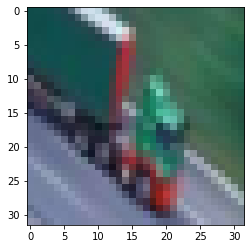

In [4]:
img, label = dataset[50]

plt.imshow(img)
label, classes[label]

In [5]:
tensor_transforms = transforms.ToTensor()
img_tensor = tensor_transforms(img)

img, img_tensor.shape, img_tensor

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1D2CA8B95C8>,
 torch.Size([3, 32, 32]),
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902

In [6]:
permutations = []
permutations.append(img_tensor.permute(1,2,0))
permutations.append(img_tensor.permute(2,1,0))
permutations.append(img_tensor.permute(0,2,1))
permutations.append(img_tensor.permute(0,1,2))

print(permutations[0].shape)
print(permutations[1].shape)
print(permutations[2].shape)

torch.Size([32, 32, 3])
torch.Size([32, 32, 3])
torch.Size([3, 32, 32])


Permutacion Invalida: 2
torch.Size([3, 32, 32])


Permutacion Invalida: 3
torch.Size([3, 32, 32])




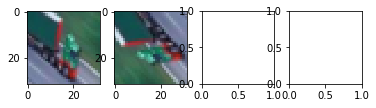

In [7]:
fig, axs = plt.subplots(1, len(permutations))
for i, permutation in enumerate(permutations):
    try:
        axs[i].imshow(permutation)
    except TypeError:
        print(f'Permutacion Invalida: {i}\n{permutation.shape}\n\n')

## Comvertimos a tensor directamente en el Dataset

In [11]:
dataset =  datasets.CIFAR10('.', download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [12]:
img, label = dataset[50]
img.shape, label, classes[label]

(torch.Size([3, 32, 32]), 9, 'truck')

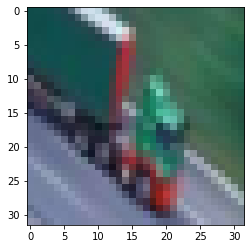

In [15]:
plt.imshow(img.permute(1,2,0))

In [17]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [25]:
len(dataset), len(imgs), imgs.shape

(50000, 3, torch.Size([3, 32, 32, 50000]))

In [26]:
imgs.view?

Docstring:
view(*shape) -> Tensor

Returns a new tensor with the same data as the :attr:`self` tensor but of a
different :attr:`shape`.

The returned tensor shares the same data and must have the same number
of elements, but may have a different size. For a tensor to be viewed, the new
view size must be compatible with its original size and stride, i.e., each new
view dimension must either be a subspace of an original dimension, or only span
across original dimensions :math:`d, d+1, \dots, d+k` that satisfy the following
contiguity-like condition that :math:`\forall i = 0, \dots, k-1`,

.. math::

  \text{stride}[i] = \text{stride}[i+1] \times \text{size}[i+1]

Otherwise, :meth:`contiguous` needs to be called before the tensor can be
viewed. See also: :meth:`reshape`, which returns a view if the shapes are
compatible, and copies (equivalent to calling :meth:`contiguous`) otherwise.

Args:
    shape (torch.Size or int...): the desired size

Example::

    >>> x = torch.randn(4, 4)
    >

## Obtenemos dataset transsformado a tensor y normalizado

In [28]:
imgs_combinate = imgs.view(3, -1)
imgs.shape, imgs_combinate.shape

(torch.Size([3, 32, 32, 50000]), torch.Size([3, 51200000]))

In [31]:
imgs_combinate.mean().shape, imgs_combinate.mean(dim=1).shape, imgs_combinate.mean(dim=0).shape

(torch.Size([]), torch.Size([3]), torch.Size([51200000]))

In [42]:
mean = imgs_combinate.mean(dim=1).tolist()
std = imgs_combinate.std(dim=1).tolist()
tuple(mean), tuple(std)

((0.49147000908851624, 0.48226797580718994, 0.44678035378456116),
 (0.24703224003314972, 0.24348513782024384, 0.26158785820007324))

In [47]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize( mean, std )
    ])

In [48]:
dataset =  datasets.CIFAR10('.', download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


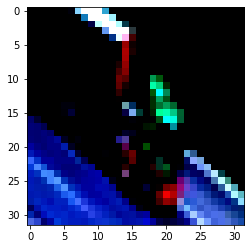

In [49]:
img, label = dataset[50]
plt.imshow(img.permute(1,2,0))
